In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
with open('/content/drive/MyDrive/wikitext-2/wikitext-2/wiki.train.tokens', 'r') as file:
    content1  = file.readlines()

with open('/content/drive/MyDrive/wikitext-2/wikitext-2/wiki.test.tokens', 'r') as file:
    content2  = file.readlines()

with open('/content/drive/MyDrive/wikitext-2/wikitext-2/wiki.valid.tokens', 'r') as file:
    content3  = file.readlines()

In [3]:
content = content1 + content2 + content3

In [4]:
article_names = []
article_index = []
for index, text in enumerate(content):
  if len(text) < 5:
    continue
  if (text[1] == '=') and (text[3] != '='):
    article_names.append(text)
    article_index.append(index)
article_index.append(len(content)-1)

In [5]:
article_names

[' = Valkyria Chronicles III = \n',
 ' = Tower Building of the Little Rock Arsenal = \n',
 ' = <unk> Mary Barker = \n',
 " = Gambia women 's national football team = \n",
 ' = Plain maskray = \n',
 ' = 2011 – 12 Columbus Blue Jackets season = \n',
 ' = <unk> ; <unk> = \n',
 ' = Goals ; A = \n',
 ' = Points ; <unk> = \n',
 ' = Games Played ; <unk> = \n',
 ' = Wins ; L = \n',
 ' = <unk> Losses ; GA = \n',
 ' = <unk> ; Sv % = \n',
 ' = Gregorian Tower = \n',
 " = There 's Got to Be a Way = \n",
 ' = Nebraska Highway 88 = \n',
 ' = USS Atlanta ( 1861 ) = \n',
 ' = Jacqueline Fernandez = \n',
 ' = John Cullen = \n',
 ' = SMS Erzherzog Ferdinand Max = \n',
 ' = Ancient Egyptian deities = \n',
 ' = South of Heaven = \n',
 ' = General aviation in the United Kingdom = \n',
 ' = SMS Zrínyi = \n',
 ' = Geopyxis carbonaria = \n',
 ' = Gold dollar = \n',
 ' = Johnson – Corey – Chaykovsky reaction = \n',
 ' = Treaty of Ciudad Juárez = \n',
 ' = The Feast of the Goat = \n',
 ' = Charles Eaton ( RAAF 

In [6]:
not_articles = [' = <unk> ; <unk> = \n', ' = Goals ; A = \n', ' = Points ; <unk> = \n', ' = Games Played ; <unk> = \n', ' = Wins ; L = \n', ' = <unk> Losses ; GA = \n', ' = <unk> ; Sv % = \n', ' = Played , W = \n', ' = Losses , D = \n', ' = Ties , A = \n', ' = <unk> points , <unk> = \n', ' = <unk> / <unk> , Pts = \n', ' = Played , W = \n', ' = Ties , L = \n', ' = No result , Pts = \n', ' = Played , W = \n', ' = Losses , T = \n', ' = No result , Pts = \n', ' = Played , W = \n', ' = Ties , L = \n', ' = No result , Pts = \n', ' = Played , W = \n', ' = Losses , T = \n', ' = No result , Pts = \n']

In [7]:
to_remove = []
for i in not_articles:
  index = article_names.index(i)
  to_remove.append(index)

In [8]:
len(to_remove)

24

In [9]:
to_remove

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 231,
 232,
 233,
 234,
 235,
 231,
 237,
 238,
 231,
 240,
 238,
 231,
 237,
 238,
 231,
 240,
 238]

In [10]:
article_names = [value for index, value in enumerate(article_names) if index not in to_remove]
article_index = [value for index, value in enumerate(article_index) if index not in to_remove]

# for index in to_remove:
#   print(article_names.pop(index))
#   print(article_index.pop(index))

In [11]:
article_names

[' = Valkyria Chronicles III = \n',
 ' = Tower Building of the Little Rock Arsenal = \n',
 ' = <unk> Mary Barker = \n',
 " = Gambia women 's national football team = \n",
 ' = Plain maskray = \n',
 ' = 2011 – 12 Columbus Blue Jackets season = \n',
 ' = Gregorian Tower = \n',
 " = There 's Got to Be a Way = \n",
 ' = Nebraska Highway 88 = \n',
 ' = USS Atlanta ( 1861 ) = \n',
 ' = Jacqueline Fernandez = \n',
 ' = John Cullen = \n',
 ' = SMS Erzherzog Ferdinand Max = \n',
 ' = Ancient Egyptian deities = \n',
 ' = South of Heaven = \n',
 ' = General aviation in the United Kingdom = \n',
 ' = SMS Zrínyi = \n',
 ' = Geopyxis carbonaria = \n',
 ' = Gold dollar = \n',
 ' = Johnson – Corey – Chaykovsky reaction = \n',
 ' = Treaty of Ciudad Juárez = \n',
 ' = The Feast of the Goat = \n',
 ' = Charles Eaton ( RAAF officer ) = \n',
 ' = Tina Fey = \n',
 ' = WASP @-@ 44 = \n',
 ' = Elephanta Caves = \n',
 ' = Devin Townsend = \n',
 ' = Zagreb Synagogue = \n',
 ' = 1806 Great Coastal hurricane = \n

In [12]:
#number of articles
len(article_names)

738

In [13]:
article_index[:10]

[1, 51, 133, 271, 287, 316, 406, 433, 464, 480]

In [14]:
temp_article = ''
article_content = []
for i in range(len(article_index)-1):
  for j in range(article_index[i] + 1, article_index[i+1]):
    temp_article += content[j]
  article_content.append(temp_article)
  temp_article = ''

In [15]:
len(article_content)

738

In [16]:
article_content[604]

" \n The Canning Dam and reservoir provide a major fresh water resource for the city of Perth , Western Australia . The dam is situated on the Darling <unk> and is an <unk> of the Canning River . It is noted for its innovative structural and hydraulic design that was considered to be at the forefront of concrete gravity dam design at the time of construction . The Canning Dam was Perth 's primary water supply up until the 1960s when other sources of fresh water were <unk> . Currently the dam supplies approximately 20 percent of Perth 's fresh water . <unk> into the Canning Reservoir is estimated to be 22 gigalitres ( 780 @,@ 000 @,@ 000 cu ft ) and has a storage capacity of 90 @,@ 352 <unk> ( 3 @,@ 190 @.@ 8 × 10 ^ 6 cu ft ) . \n Since its completion in 1940 , the Canning Dam has contributed to a wide range of environmental and ecological problems in surrounding regions , problems include more common algal blooms , habitat loss and sedimentation . Despite these issues , Canning Dam and

In [26]:
article_names[227]

' = Played , W = \n'

In [17]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
def get_word_count(text):
    words = word_tokenize(text)
    word_count = len(words)

    return word_count

In [19]:
article_word_counts = []
for text in article_content:
  article_length = get_word_count(text)
  article_word_counts.append(article_length)

In [27]:
to_drop = []
for index, w_counts in enumerate(article_word_counts):
  if w_counts < 5:
    to_drop.append(index)

In [28]:
article_names = [value for index, value in enumerate(article_names) if index not in to_drop]
article_word_counts = [value for index, value in enumerate(article_word_counts) if index not in to_drop]

In [29]:
len(article_word_counts)

734

In [30]:
sorted_pairs = sorted(zip(article_names, article_word_counts), key=lambda x: x[1], reverse=True)

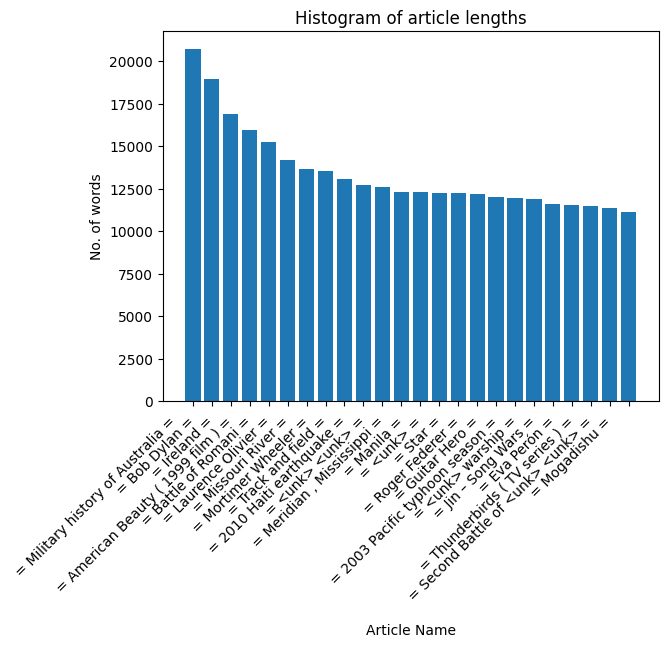

In [31]:
import matplotlib.pyplot as plt

sorted_article_names, sorted_article_word_counts = zip(*sorted_pairs)

article_names_25 = sorted_article_names[:25]
article_word_counts_25 = sorted_article_word_counts[:25]

plt.bar(article_names_25, article_word_counts_25)

plt.xlabel('Article Name')
plt.ylabel('No. of words')
plt.title('Histogram of article lengths')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [32]:
total_words = 0
for text in content:
  count = get_word_count(text)
  total_words += count

In [33]:
#total no. of tokens
total_words

2728236

In [34]:
def get_unique_word_count(text):
    words = word_tokenize(text)
    word_count = len(set(words))

    return word_count

In [35]:
total_unique_words = 0
for text in content:
  count = get_unique_word_count(text)
  total_unique_words += count

In [36]:
#no. of unique words
total_unique_words

1560349